
<div style="border:1px solid black; padding:20px 20px;text-align: justify;text-justify: inter-word">
    <strong>Exercise Session 2 - *PART 1* (over 2) - Computer vision: Hough Tranform <br/> Duration : 2 hours in session (PART 2 will be given separetely [basics of computer vision] and can be started during the session and at home) </strong><br/><br/>
    <span style="text-decoration:underline;font-weight:bold;">How to use this notebook?</span><br/>
    This notebook is made of text cells and code cells. The code cells have to be <strong>executed</strong> to see the result of the program. To execute a cell, simply select it and click on the "play" button (<span style="font: bold 12px/30px Arial, serif;">&#9658;</span>) in the tool bar just above the notebook, or type <code>shift + enter</code>. It is important to execute the code cells in their order of appearance in the notebook.<br/>
</div>

<br/>

- Please use code for any calculations 
- Feel free to use <strong>markdown</strong> or Raw NBConvert cells for your notes. </div>

**Note**: The images used in this session are from online tutorials. While references are left out to avoid giving away answers, make sure to cite your sources properly in your project

In [47]:
#installations
!pip install opencv-python tqdm matplotlib numpy ipywidgets

---
# Instruction for experiment AI Tutor: 
While completing this notebook, you'll have the opportunity to use AI tutor. Here you can access to it: **https://graphsearch.epfl.ch/en/chatbot?model=MICRO-452-tutor** if you consent to particpate to the experiment. Please **exclusively use this language model** for all tasks for today (not copilot, chatGPT, etc)

---

# Implementing the Hough Transform to Identify Straight Lines in an Image


## Learning Goals

The goal of this exercise is going to be to code the Hough transform to identify straight lines in an image. We are going to use the following image throughout the exercise in order to test the different steps. The image is located in the Images folder under ``pentagon.png``

As this is one of your first "big" coding exercises we are going to guide you through it.



![Pentagon](images/pentagon.png)


## Importing the libraries 

We are going to need the :

- `opencv` for image processing (software library that provides a comprehensive set of tools for computer vision tasks. It's widely used in applications ranging from real-time video processing to advanced robotics.)

- `math` for the trigonometry functions

- `numpy` for array processing

- `matplotlib` for plotting

In [48]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt 

## Loading and displaying the image
### Importing OpenCV, Reading and Displaying an Image
OpenCV<sup id="a1">[1](#f1)</sup> is a software library that provides a comprehensive set of tools for image processing and computer vision tasks. It's widely used in applications ranging from real-time video processing to advanced robotics.

Start by giving the filename with the full path so that the mpimg module can load the image with the imread function. 

Then display the image object with plt.imshow()

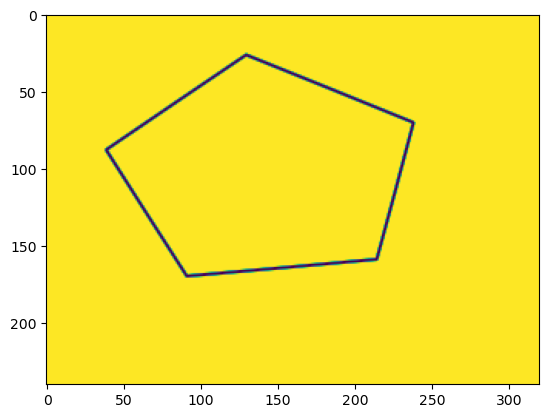

In [49]:
filename = 'images/pentagon.png'
img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

plt.imshow(img)

## Creating the hough transform matrix

1. We start by creating a numpy array of arbitrary dimensions. 

--> create the hough transform matrix (filled with zeros), called **_hough_space_**

In [50]:
# We choose to have a final matrix of the following
# dimensions. This is an arbitrary decision

r_dim = 200 
theta_dim = 300

#code here
hough_space = np.zeros((r_dim, theta_dim))

2. Now we need to relate the dimensions of this new matrix to the corresponding values along the rho and theta axes. This means we need to determine the minimum and maximum values of theta and rho. 

--> Find the values of **theta min** and **theta max**


--> From the image shape, determine **rho min** and **rho max**

In [51]:
#code here

# Image shape 
height, width = img.shape[:2]
print(f"Image dimensions: width={width}, height={height}")

# Theta axis
theta_min = 0
theta_max = np.pi

# Rho axis
(x_max, y_max) = img.shape
r_min = 0.0
r_max = math.hypot(x_max, y_max)

print(r_max)

Image dimensions: width=320, height=240
400.0


Now we are going to compute the hough transform of the original image. The pseudo code is the following :

    for all pixels:
        if the pixel is white:
              do nothing
        else:
            for theta values :
                compute rho from the pixel coordinates and theta
                normalise rho 
                update the hough space matrix for the theta and rho coordinates in the array
                
You should get a result similar to this one 


<br/>

![Pentagon](images/houghTransform.png)

<br/>



Text(0.5, 1.0, 'Hough Space')

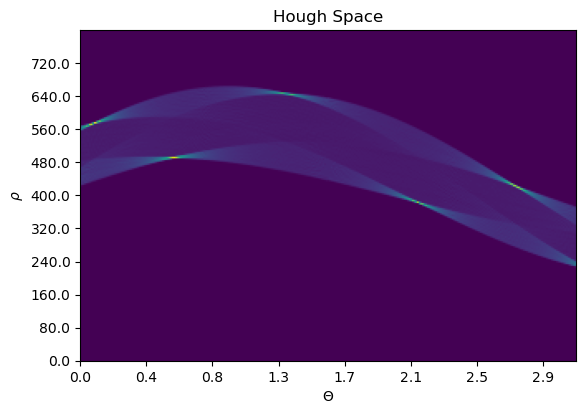

In [52]:
for x in range(x_max):
    for y in range(y_max):
        if img[x,y] == 255: continue # if  pixel = white continue
        for idx_theta in range(theta_dim): 
            theta = 1.0 * idx_theta * theta_max / theta_dim 
            r = x * math.cos(theta) + y * math.sin(theta) # calculate rho
            ir = int(r_dim * (r + r_max) / (2 * r_max)) # calculate the index of rho

            hough_space[int(ir),int(idx_theta)] += 1
            
# Plotting function
plt.imshow(hough_space, origin='lower')

#################### We add values and labels to the axes################
plt.xlim(0,theta_dim)
plt.ylim(0,r_dim)

tick_locs = [i for i in range(0,theta_dim,40)]
tick_lbls = [round( (1.0 * i * theta_max) / theta_dim,1) for i in range(0,theta_dim,40)]
plt.xticks(tick_locs, tick_lbls)

tick_locs = [i for i in range(0,r_dim,20)]
tick_lbls = [round( (1.0 * i * 2*r_max ) / r_dim,1) for i in range(0,r_dim,20)]
plt.yticks(tick_locs, tick_lbls)

plt.xlabel(r'$\Theta$')
plt.ylabel(r'$\rho$')
plt.title('Hough Space')
            



## Identifying the maxima of the Hough Transform

After calculating the Hough space, the next step is to find the local extrema. This will give us the rho and theta parameters of the different straight lines in the image. 

To find the extrema, we will do the following :

1. isolate the brightest spots

2. enlarge the size of the spots

3. find the centroid of the spots

### Isolating the brightest spots through thresholding

To isolate the bright spots and remove the gradients around the maxima we are going to apply **thresholding** to convert the image into 0's for the dark areas and 1's around the maximas. Have a look [here](https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html) at the different thresholding functions that opencv has to offer. 

Play with the parameters to try to obtain an image similar to this one 

<br/>

![Pentagon](images/thresholding_output.png)

<br/>

Text(0.5, 1.0, 'Hough Space')

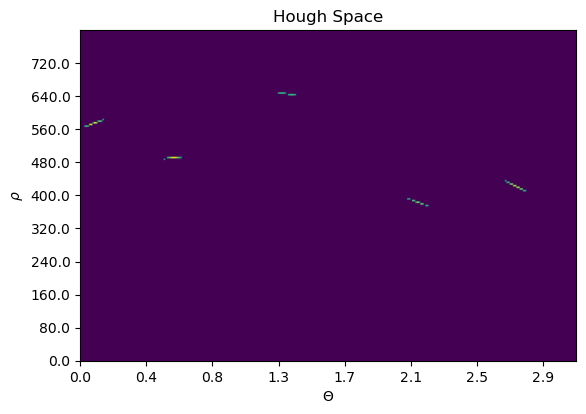

In [53]:
#code here

threshold = 200
hough_space_thresh = hough_space.copy()
for r in range(r_dim):
    for theta in range(theta_dim):
        if hough_space[r,theta] < threshold:
            hough_space_thresh[r,theta] = 0

plt.imshow(hough_space_thresh, origin='lower')

plt.xlim(0,theta_dim)
plt.ylim(0,r_dim)

tick_locs = [i for i in range(0,theta_dim,40)]
tick_lbls = [round( (1.0 * i * theta_max) / theta_dim,1) for i in range(0,theta_dim,40)]
plt.xticks(tick_locs, tick_lbls)

tick_locs = [i for i in range(0,r_dim,20)]
tick_lbls = [round( (1.0 * i * 2*r_max ) / r_dim,1) for i in range(0,r_dim,20)]
plt.yticks(tick_locs, tick_lbls)

plt.xlabel(r'$\Theta$')
plt.ylabel(r'$\rho$')
plt.title('Hough Space')

### Enlarging the size of the spots through morphological operators

To identify the location of the local maxima, we will make use of find contours. However the spots in the image are too small to apply the opencv functions. That is why we are going to start by increasing their size through morphological operations. Have a look [here](https://docs.opencv.org/master/d9/d61/tutorial_py_morphological_ops.html) to see the different operators and their effect on a binary image. 


You should get an image like this one : 

<br/>

![Pentagon](images/morphological_output.png)

<br/>

Text(0.5, 1.0, 'Hough Space')

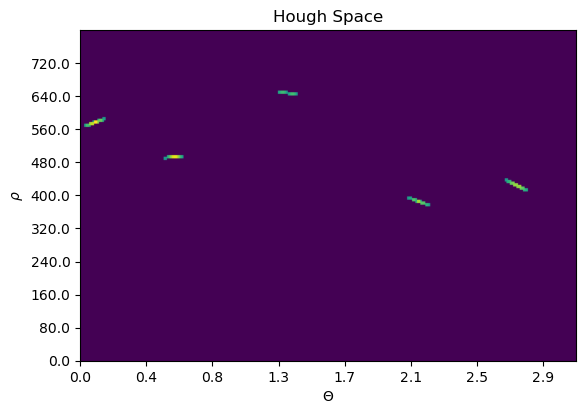

In [54]:
#code here

kernel = np.ones((2,2),np.uint8)
dilation_hough_space_thresh = cv2.dilate(hough_space_thresh,kernel,iterations = 1)

plt.imshow(dilation_hough_space_thresh, origin='lower')

plt.xlim(0,theta_dim)
plt.ylim(0,r_dim)

tick_locs = [i for i in range(0,theta_dim,40)]
tick_lbls = [round( (1.0 * i * theta_max) / theta_dim,1) for i in range(0,theta_dim,40)]
plt.xticks(tick_locs, tick_lbls)

tick_locs = [i for i in range(0,r_dim,20)]
tick_lbls = [round( (1.0 * i * 2*r_max ) / r_dim,1) for i in range(0,r_dim,20)]
plt.yticks(tick_locs, tick_lbls)

plt.xlabel(r'$\Theta$')
plt.ylabel(r'$\rho$')
plt.title('Hough Space')

### Identifying the Centroids' Locations Through Contours 

Now we have bigger spots and we are going to use Opencv's built in functions to find the contours and deduce the location of the centroid in the hough space. [An example is provided here](https://www.learnopencv.com/find-center-of-blob-centroid-using-opencv-cpp-python/). 

You should get a result similar to this one : 


<br/>

![Pentagon](images/centroid_output.png)

<br/>

In [58]:
#your code here
# find contours in the binary image
output = dilation_hough_space_thresh.copy()
contours, hierarchy = cv2.findContours(dilation_hough_space_thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

#Converting to color for the visualisation
output = cv2.cvtColor(output,cv2.COLOR_GRAY2RGB) 

maxima_locs = []

for c in contours:
    # calculate moments for each contour
    M = cv2.moments(c)

    # calculate x, y coordinate of center
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    
    maxima_locs.append((cX, cY))
    cv2.circle(output, (cX, cY), 2, (255, 0, 0), -1)
    
# display the image
plt.imshow(output, origin="lower")


tick_locs = [i for i in range(0,theta_dim,40)]
tick_lbls = [round( (1.0 * i * theta_max) / theta_dim,1) for i in range(0,theta_dim,40)]
plt.xticks(tick_locs, tick_lbls)

tick_locs = [i for i in range(0,r_dim,20)]
tick_lbls = [round( (1.0 * i * 2*r_max ) / r_dim,1) for i in range(0,r_dim,20)]
plt.yticks(tick_locs, tick_lbls)

plt.xlabel(r'$\Theta$')
plt.ylabel(r'$\rho$')
plt.title('Hough Space')

plt.savefig("./images/centroid_output.png")


error: OpenCV(4.12.0) /io/opencv/modules/imgproc/src/contours_new.cpp:332: error: (-2:Unspecified error) in function 'static std::shared_ptr<ContourScanner_> ContourScanner_::create(cv::ContourDataStorage<cv::Point_<int>, 1024, 0>::storage_t&, cv::ContourDataStorage<signed char, 1024, 0>::storage_t&, cv::Mat, int, int, cv::Point)'
> Modes other than RETR_FLOODFILL and RETR_CCOMP support only CV_8UC1 images (expected: 'img.type() == CV_8UC1'), where
>     'img.type()' is 6 (CV_64FC1)
> must be equal to
>     'CV_8UC1' is 0 (CV_8UC1)


## Computing the location of the straight lines in the original image and drawing them

With the maxima obtained, we can now compute the corresponding segments in the original image. You should get a result similar to this one. 


<br/>

![Pentagon](images/hough_transform.png)

<br/>


In [56]:
#your code here

> Note that the overall exercise was inspired from the example [here](https://www.science-emergence.com/Articles/Implementing-a-simple-python-code-to-detect-straight-lines-using-Hough-transform/)

---
<span style="color:green">

## Please come back to the questionnaire (survey)
    
Come back to the webpage where you have the questionnaire and upload:

(Even if Incomplete, Please Submit 🙏🏼)
- This juypter notebook <code>Exercise_2_AI_tutor.ipynb<code>
</span>
---